In [ ]:
#자 이거 실행하시고 자기 계정으로 로그인한 뒤에 나오는 코드를 복사해서 아래에 넣고 엔터치면 됩니다
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#공유문서함에서 DS_contest폴더를 내 드라이브로 옮긴 뒤에 실행하십쇼
!ls '/gdrive/My Drive/DS_contest'

'참고코드(태양광)'   data1.csv	 df2.csv       Figures	       trainSet.csv
 211118_chat.txt     data2.csv	 df2_sg.csv    Modeling
 211118_video.mp4    df1.csv	 examSet.csv   Preprocessing


In [ ]:
#두번째줄까지 실행하고나면 이제 EDA시작 ㄱㄱ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#여기까진 친절히 써드릴게 ^^
data = pd.read_csv('/gdrive/My Drive/DS_contest/trainSet.csv')

In [ ]:
data2=pd.read_csv('/gdrive/My Drive/DS_contest/data2.csv')
data2

,Unnamed: 0,Unnamed: 0.1,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),Y_first6,Y_last6,Y_t,C_t,J_t,time
0,0,48,1,1,2908,2888,20325,10015,0.834538,0.824660,0.006075,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.70,75.56,2295.07,41017.91,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0.0,5821.72,99180.33333,40612.5,129303.0,1323.0,600.0,6
1,1,48,1,1,2908,2888,20325,10015,0.834538,0.824660,0.006075,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.70,75.56,2295.07,41017.91,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0.0,5821.72,99180.33333,40612.5,162132.0,0.0,744.0,7
2,2,48,1,1,2908,2888,20325,10015,0.834538,0.824660,0.006075,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.70,75.56,2295.07,41017.91,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0.0,5821.72,99180.33333,40612.5,126960.0,27102.0,681.0,8
3,3,48,1,1,2908,2888,20325,10015,0.834538,0.824660,0.006075,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.70,75.56,2295.07,41017.91,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0.0,5821.72,99180.33333,40612.5,118344.0,22209.0,600.0,9
4,4,48,1,1,2908,2888,20325,10015,0.834538,0.824660,0.006075,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.70,75.56,2295.07,41017.91,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0.0,5821.72,99180.33333,40612.5,123348.0,17874.0,716.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,8347,279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,Water,4479.20,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.60,3.51,1.54,Sand,Sand,40/70,159.97,4479.20,0.0,4479.20,36691.33333,17640.5,19773.0,3366.0,702.0,72
8348,8348,279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,Water,4479.20,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.60,3.51,1.54,Sand,Sand,40/70,159.97,4479.20,0.0,4479.20,36691.33333,17640.5,18474.0,3693.0,722.0,73
8349,8349,279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,Water,4479.20,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.60,3.51,1.54,Sand,Sand,40/70,159.97,4479.20,0.0,4479.20,36691.33333,17640.5,16350.0,3552.0,733.0,74
8350,8350,279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,Water,4479.20,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.60,3.51,1.54,Sand,Sand,40/70,159.97,4479.20,0.0,4479.20,36691.33333,17640.5,15495.0,3357.0,668.0,75


In [ ]:
data2.loc[:,'J_t']

0       600.0
1       744.0
2       681.0
3       600.0
4       716.0
        ...  
8347    702.0
8348    722.0
8349    733.0
8350    668.0
8351    734.0
Name: J_t, Length: 8352, dtype: float64

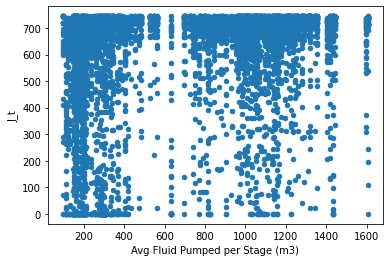

In [ ]:
data2.plot.scatter(x='Avg Fluid Pumped per Stage (m3)', y='J_t')

In [ ]:
select.insert(0,'num',number)
select

,num,First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,GAS_MONTH_10,GAS_MONTH_11,GAS_MONTH_12,GAS_MONTH_13,GAS_MONTH_14,GAS_MONTH_15,GAS_MONTH_16,GAS_MONTH_17,GAS_MONTH_18,GAS_MONTH_19,GAS_MONTH_20,GAS_MONTH_21,GAS_MONTH_22,GAS_MONTH_23,GAS_MONTH_24,GAS_MONTH_25,GAS_MONTH_26,GAS_MONTH_27,GAS_MONTH_28,GAS_MONTH_29,GAS_MONTH_30,GAS_MONTH_31,GAS_MONTH_32,GAS_MONTH_33,GAS_MONTH_34,GAS_MONTH_35,GAS_MONTH_36,Last 6 mo. Avg. GAS (Mcf),CND_MONTH_1,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
0,354,99580.58333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,372,82942.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383,55833.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,395,95592.08333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397,104730.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,43417.00000,80178.0,75621.0,61350.0,53199.0,48366.0,41274.0,36843.0,33798.0,32988.0,29613.0,26802.0,28488.0,27231.0,24786.0,26313.0,25461.0,26175.0,25599.0,25392.0,23601.0,21450.0,20403.0,19854.0,13296.0,22113.0,21831.0,22734.0,21135.0,20505.0,19425.0,19368.0,18495.0,17349.0,16494.0,16344.0,13089.0,16856.5,38094.0,...,2592.0,2496.0,2862.0,2265.0,576.0,648.0,638.0,739.0,741.0,672.0,738.0,717.0,740.0,718.0,735.0,741.0,533.0,741.0,717.0,744.0,736.0,668.0,739.0,717.0,736.0,716.0,743.0,713.0,716.0,742.0,718.0,721.0,743.0,692.0,739.0,717.0,740.0,719.0,726.0,744.0
276,716,46754.00000,48177.0,85713.0,0.0,12315.0,121689.0,123162.0,71886.0,30033.0,70137.0,66873.0,65700.0,59979.0,46977.0,41661.0,39807.0,38343.0,36234.0,35121.0,32538.0,30093.0,28695.0,23238.0,28353.0,29040.0,23772.0,22578.0,21570.0,19785.0,20931.0,20328.0,21036.0,21096.0,20781.0,20004.0,19869.0,20691.0,20579.5,429.0,...,4263.0,4113.0,4035.0,4089.0,133.0,38.0,0.0,172.0,728.0,707.0,

In [ ]:
select.drop('num',axis=1,inplace=True)
select

,First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,GAS_MONTH_10,GAS_MONTH_11,GAS_MONTH_12,GAS_MONTH_13,GAS_MONTH_14,GAS_MONTH_15,GAS_MONTH_16,GAS_MONTH_17,GAS_MONTH_18,GAS_MONTH_19,GAS_MONTH_20,GAS_MONTH_21,GAS_MONTH_22,GAS_MONTH_23,GAS_MONTH_24,GAS_MONTH_25,GAS_MONTH_26,GAS_MONTH_27,GAS_MONTH_28,GAS_MONTH_29,GAS_MONTH_30,GAS_MONTH_31,GAS_MONTH_32,GAS_MONTH_33,GAS_MONTH_34,GAS_MONTH_35,GAS_MONTH_36,Last 6 mo. Avg. GAS (Mcf),CND_MONTH_1,CND_MONTH_2,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
0,99580.58333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82942.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55833.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95592.08333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104730.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,43417.00000,80178.0,75621.0,61350.0,53199.0,48366.0,41274.0,36843.0,33798.0,32988.0,29613.0,26802.0,28488.0,27231.0,24786.0,26313.0,25461.0,26175.0,25599.0,25392.0,23601.0,21450.0,20403.0,19854.0,13296.0,22113.0,21831.0,22734.0,21135.0,20505.0,19425.0,19368.0,18495.0,17349.0,16494.0,16344.0,13089.0,16856.5,38094.0,28632.0,...,2592.0,2496.0,2862.0,2265.0,576.0,648.0,638.0,739.0,741.0,672.0,738.0,717.0,740.0,718.0,735.0,741.0,533.0,741.0,717.0,744.0,736.0,668.0,739.0,717.0,736.0,716.0,743.0,713.0,716.0,742.0,718.0,721.0,743.0,692.0,739.0,717.0,740.0,719.0,726.0,744.0
276,46754.00000,48177.0,85713.0,0.0,12315.0,121689.0,123162.0,71886.0,30033.0,70137.0,66873.0,65700.0,59979.0,46977.0,41661.0,39807.0,38343.0,36234.0,35121.0,32538.0,30093.0,28695.0,23238.0,28353.0,29040.0,23772.0,22578.0,21570.0,19785.0,20931.0,20328.0,21036.0,21096.0,20781.0,20004.0,19869.0,20691.0,20579.5,429.0,22653.0,...,4263.0,4113.0,4035.0,4089.0,133.0,38.0,0.0,17

In [ ]:
#NaN 데이터 든 행(0~47) 제거
old_select=select.dropna(axis=0)
old_select

,First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,GAS_MONTH_10,GAS_MONTH_11,GAS_MONTH_12,GAS_MONTH_13,GAS_MONTH_14,GAS_MONTH_15,GAS_MONTH_16,GAS_MONTH_17,GAS_MONTH_18,GAS_MONTH_19,GAS_MONTH_20,GAS_MONTH_21,GAS_MONTH_22,GAS_MONTH_23,GAS_MONTH_24,GAS_MONTH_25,GAS_MONTH_26,GAS_MONTH_27,GAS_MONTH_28,GAS_MONTH_29,GAS_MONTH_30,GAS_MONTH_31,GAS_MONTH_32,GAS_MONTH_33,GAS_MONTH_34,GAS_MONTH_35,GAS_MONTH_36,Last 6 mo. Avg. GAS (Mcf),CND_MONTH_1,CND_MONTH_2,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
48,99180.33333,129303.0,162132.0,126960.0,118344.0,123348.0,110403.0,97038.0,82473.0,81354.0,80334.0,75747.0,70500.0,65016.0,61455.0,60612.0,59049.0,56967.0,55557.0,54384.0,51453.0,52503.0,47718.0,46356.0,44790.0,43866.0,42549.0,41910.0,39252.0,39261.0,46926.0,41079.0,48309.0,46437.0,36555.0,35895.0,35400.0,40612.5,1323.0,0.0,...,5037.0,4230.0,4203.0,3969.0,600.0,744.0,681.0,600.0,716.0,701.0,648.0,657.0,677.0,710.0,734.0,720.0,660.0,744.0,716.0,739.0,708.0,591.0,741.0,720.0,744.0,720.0,743.0,738.0,694.0,732.0,720.0,669.0,706.0,560.0,743.0,255.0,728.0,720.0,742.0,726.0
49,102906.33330,1482.0,151515.0,235626.0,136260.0,126114.0,123303.0,114399.0,98718.0,82953.0,82551.0,78069.0,74856.0,69711.0,65205.0,63327.0,60165.0,57267.0,53136.0,53154.0,48078.0,45210.0,46650.0,41196.0,38886.0,36075.0,35217.0,33219.0,33723.0,32271.0,31977.0,36258.0,25923.0,24729.0,35724.0,26070.0,23388.0,28682.0,1548.0,14967.0,...,3651.0,4488.0,3726.0,3627.0,48.0,648.0,680.0,683.0,658.0,696.0,701.0,639.0,716.0,675.0,710.0,734.0,723.0,666.0,744.0,720.0,740.0,708.0,645.0,741.0,720.0,744.0,719.0,743.0,736.0,673.0,730.0,719.0,661.0,701.0,558.0,743.0,171.0,726.0,719.0,742.0
50,85081.00000,204702.0,237939.0,140163.0,107802.0,106329.0,60282.0,70878.0,72888.0,69816.0,65454.0,60054.0,49563.0,42678.0,42549.0,39663.0,37278.0,35049.0,31302.0,31227.0,29490.0,0.0,0.0,13917.0,19857.0,21729.0,20052.0,21618.0,22710.0,25584.0,27090.0,25713.0,32997.0,24762.0,26496.0,25263.0,25278.0,26751.5,0.0,297.0,...,6687.0,6072.0,5775.0,5709.0,408.0,698.0,681.0,708.0,380.0,72.0,646.0,695.0,673.0,706.0,736.0,709.0,655.0,744.0,715.0,740.0,705.0,643.0,601.0,675.0,0.0,222.0,653.0,733.0,667.0,724.0,719.0,642.0,690.0,558.0,743.0,446.0,726.0,718.0,742.0,730.0
51,74719.91667,122931.0,178464.0,125649.0,92613.0,93096.0,99567.0,54078.0,45219.0,63117.0,55056.0,51564.0,45282.0,37257.0,39834.0,37641.0,31953.0,31446.0,48615.0,37506.0,40932.0,0.0,4839.0,25617.0,30039.0,24693.0,20943.0,25638.0,23046.0,18423.0,30969.0,25932.0,24387.0,27138.0,24939.0,23334.0,21852.0,24597.0,159.0,42.0,...,5157.0,4101.0,3687.0,3927.0,360.0,716.0,495.0,696.0,641.0,701.0,679.0,636.0,675.0,703.0,734.0,724.0,656.0,744.0,715.0,647.0,550.0,517.0,682.0,665.0,0.0,425.0,587.0,738.0,689.0,742.0,719.0,610.0,679.0,558.0,743.0,186.0,715.0,718.0,742.0,713.0
52,95972.00000,176409.0,211509.0,150930.0,95274.0,93339.0,88740.0,75798.0,98001.0,101079.0,89520.0,72282.0,44712.0,42243.0,40095.0,37668.0,37560.0,38157.0,34578.0,35910.0,33882.0,52929.0,33858.0,30177.0,26553.0,25755.0,25230.0,25395.0,28158.0,27123.0,28479.0,24810.0,23709.0,28008.0,20445.0,19320.0,19827.0,22686.5,3.0,0.0,...,4752.0,3765.0,3345.0,3678.0,408.0,702.0,526.0,672.0,688.0,701.0,682.0,713.0,677.0,708.0,736.0,723.0,663.0,744.0,719.0,728.0,707.0,613.0,722.0,707.0,229.0,566.0,727.0,729.0,694.0,712.0,717.0,630.0,673.0,498.0,712.0,185.0,722.0,719.0,743.0,727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
#생산정 48개(0~47)는 새로 뽑는거, 생산정 232(48~279)개는 기존에 있던거
#gas

In [ ]:
o_select=[]
for i in range(0,232):
  o_select.append(old_select.iloc[i])
o_select[0]

First 6 mo. Avg. GAS (Mcf)     99180.33333
GAS_MONTH_1                   129303.00000
GAS_MONTH_2                   162132.00000
GAS_MONTH_3                   126960.00000
GAS_MONTH_4                   118344.00000
                                  ...     
HRS_MONTH_32                     255.00000
HRS_MONTH_33                     728.00000
HRS_MONTH_34                     720.00000
HRS_MONTH_35                     742.00000
HRS_MONTH_36                     726.00000
Name: 48, Length: 110, dtype: float64

In [ ]:
##transpose->행/열 바꾸는거
arb = []
arbdf = []
for i in range(232):
  arb.append(o_select[i])
  o_select[i] = o_select[i].to_frame().transpose()
  arbdf.append(o_select[i])
o_select[0]

,First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,GAS_MONTH_10,GAS_MONTH_11,GAS_MONTH_12,GAS_MONTH_13,GAS_MONTH_14,GAS_MONTH_15,GAS_MONTH_16,GAS_MONTH_17,GAS_MONTH_18,GAS_MONTH_19,GAS_MONTH_20,GAS_MONTH_21,GAS_MONTH_22,GAS_MONTH_23,GAS_MONTH_24,GAS_MONTH_25,GAS_MONTH_26,GAS_MONTH_27,GAS_MONTH_28,GAS_MONTH_29,GAS_MONTH_30,GAS_MONTH_31,GAS_MONTH_32,GAS_MONTH_33,GAS_MONTH_34,GAS_MONTH_35,GAS_MONTH_36,Last 6 mo. Avg. GAS (Mcf),CND_MONTH_1,CND_MONTH_2,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
48,99180.33333,129303.0,162132.0,126960.0,118344.0,123348.0,110403.0,97038.0,82473.0,81354.0,80334.0,75747.0,70500.0,65016.0,61455.0,60612.0,59049.0,56967.0,55557.0,54384.0,51453.0,52503.0,47718.0,46356.0,44790.0,43866.0,42549.0,41910.0,39252.0,39261.0,46926.0,41079.0,48309.0,46437.0,36555.0,35895.0,35400.0,40612.5,1323.0,0.0,...,5037.0,4230.0,4203.0,3969.0,600.0,744.0,681.0,600.0,716.0,701.0,648.0,657.0,677.0,710.0,734.0,720.0,660.0,744.0,716.0,739.0,708.0,591.0,741.0,720.0,744.0,720.0,743.0,738.0,694.0,732.0,720.0,669.0,706.0,560.0,743.0,255.0,728.0,720.0,742.0,726.0


In [ ]:
for i in range(232):
  GAS_list = []
  CND_list = []
  HRS_list = []
  for j in range(36):
    GAS_list.append(arb[i][j+32])
    CND_list.append(arb[i][j+69])
    HRS_list.append(arb[i][j+105])
  data2[i]['Y_t'] = GAS_list
  data2[i]['C_t'] = CND_list
  data2[i]['J_t'] = HRS_list
data2[0]